# MCA on Dense Submatrices

## Previously on PCA:

Loading required package: ggplot2
Loading required package: plyr
Loading required package: scales
Loading required package: grid


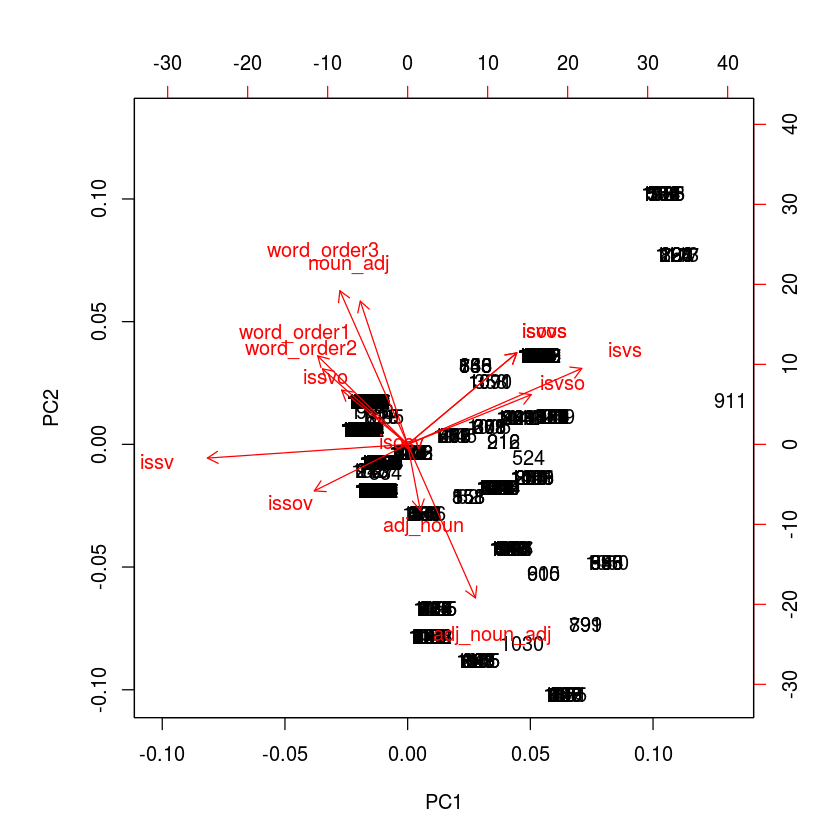

In [1]:
wals = read.csv('language.csv')
datraw <- read.csv("order-features-matrix.csv")
dat <- datraw[2:dim(datraw)[2]]
pca <- prcomp(dat,center = TRUE,scale. = TRUE)
library(ggbiplot)
biplot(pca)

# Enter MCA
### he "raw-order-features-full.csv" data holds 8 order-related features that fully span 1016 languages
### as well as some 'suplamantary' variables.

In [2]:
library(FactoMineR)
ofdata <- read.csv('raw-order-features-full.csv')
dim(ofdata)
ofdata[1,]

[1] 1016   13

X81A.Order.of.Subject..Object.and.Verb,X82A.Order.of.Subject.and.Verb,X83A.Order.of.Object.and.Verb,X87A.Order.of.Adjective.and.Noun,X143F.Postverbal.Negative.Morphemes,X143E.Preverbal.Negative.Morphemes,X143A.Order.of.Negative.Morpheme.and.Verb,X143G.Minor.morphological.means.of.signaling.negation,wals_code,Name,genus,macroarea,origindex
2 SVO,1 SV,2 VO,2 Noun-Adjective,1 VNeg,4 None,2 VNeg,4 None,aab,Arapesh (Abu),Kombio-Arapesh,Papunesia,0


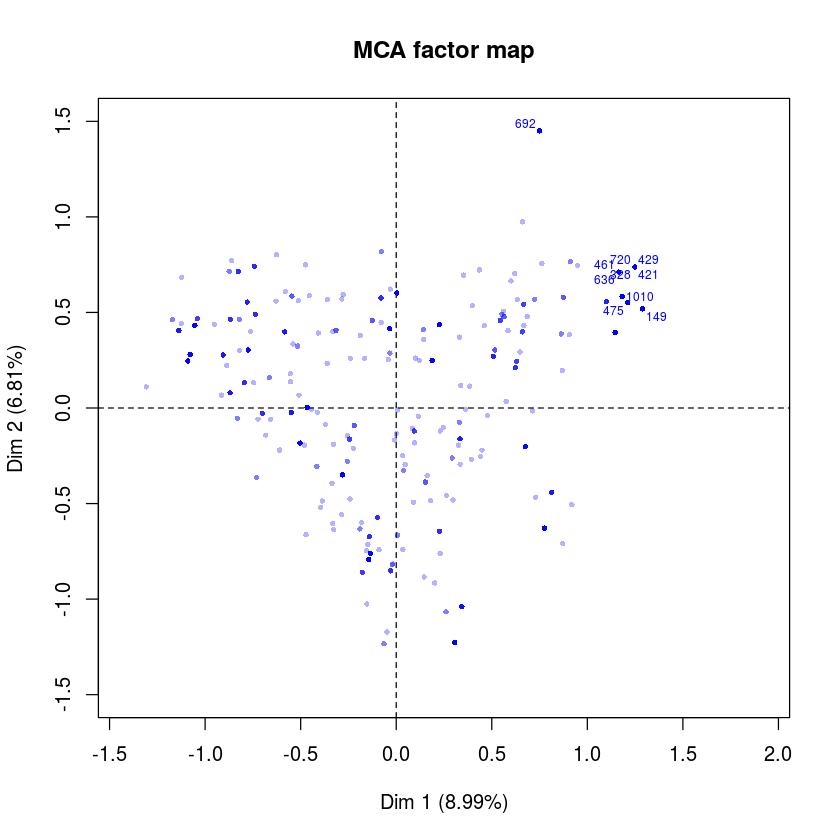

In [7]:
# mca on ofdata, with features as active variables and the rest suplementary
mca <- MCA(ofdata,quali.sup=9:12,quanti.sup=13,graph=FALSE)
plot(mca,invisible=c("var","quali.sup","quanti.sup"),select="contrib 10",cex=0.6,xlim=c(-1,1.5),ylim=c(-1.5,1.5))

the 10 most contributing languages are all bunched in cluster at the top right. What are they?

In [9]:
ofdata[c(692,720,475,1010,421,429,328,149,636,461),c('Name','genus','macroarea')]

,Name,genus,macroarea
692,Newar (Dolakha),Mahakiranti,Eurasia
720,Pawaian,Pawaian,Papunesia
475,Lavukaleve,Lavukaleve,Papunesia
1010,Zayse,North Omotic,Africa
421,Kolami,Central Dravidian,Eurasia
429,Karachay-Balkar,Turkic,Eurasia
328,Ijo (Kolokuma),Ijoid,Africa
149,Choctaw,Muskogean,North America
636,Nasioi,East Bougainville,Papunesia
461,Karkar-Yuri,Karkar-Yuri,Papunesia


Althogh many of these languages are Papunesian, this group doesn't seem so uniform in the ethno-geographic sense.

what are the contributing variables?

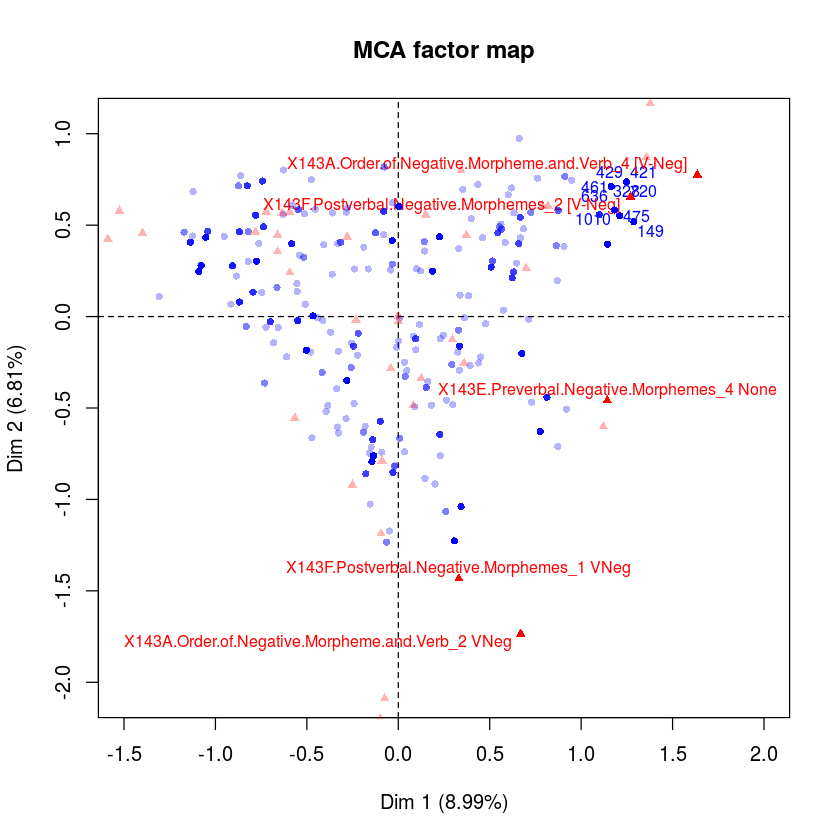

In [33]:
plot(mca,invisible=c("quali.sup","quanti.sup"),selectMod="contrib 5",select="contrib 10",cex=0.8,xlim=c(-1.5,2),ylim=c(-2,1))

So the second dimension seems to separate the WALS 143[A|F|E] features pretty well, with the VNeg variants strongly negative and the [V-Neg] variants strongly positivefor 143A and 143F....

This is also reflected in their cos2 values:

In [31]:
mca$var$eta

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
X81A.Order.of.Subject..Object.and.Verb,0.578873653,0.53310803,0.45030269,0.29037803,0.261803302
X82A.Order.of.Subject.and.Verb,0.364538346,0.06348045,0.25399666,0.22478191,0.243463749
X83A.Order.of.Object.and.Verb,0.447880825,0.33370534,0.35192234,0.14739414,0.069817247
X87A.Order.of.Adjective.and.Noun,0.014901692,0.15154579,0.03598722,0.02610595,0.002094257
X143F.Postverbal.Negative.Morphemes,0.620349704,0.65508544,0.13728566,0.28002190,0.288137227
X143E.Preverbal.Negative.Morphemes,0.568687458,0.09452577,0.43999424,0.14321980,0.324438630
X143A.Order.of.Negative.Morpheme.and.Verb,0.725235859,0.67119903,0.51963692,0.58894178,0.639380273
X143G.Minor.morphological.means.of.signaling.negation,0.007523619,0.01729306,0.06118945,0.29562603,0.094988178


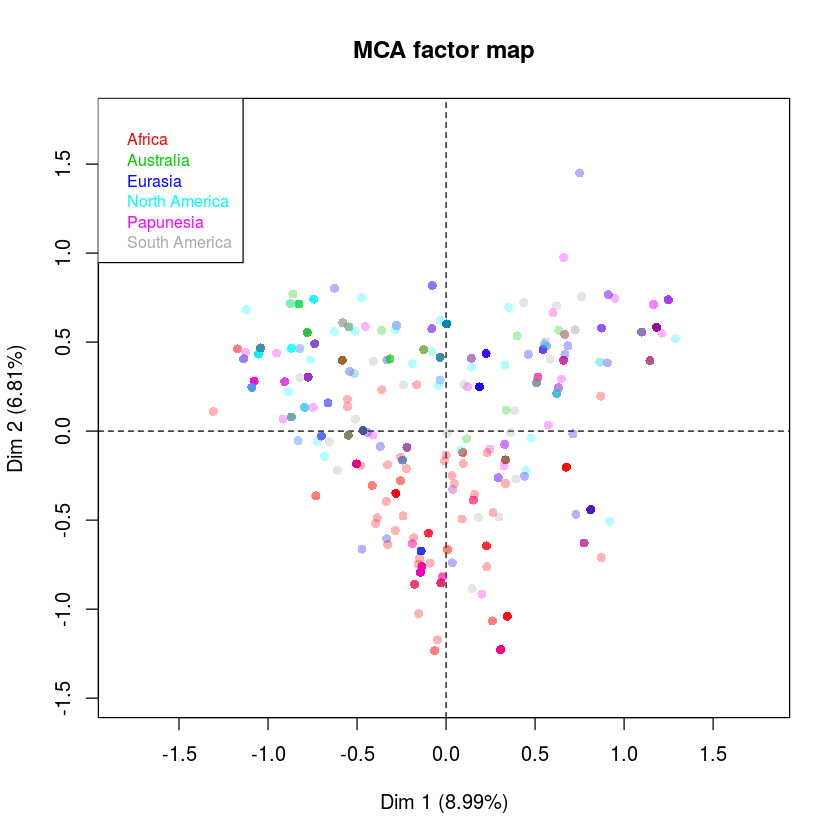

In [35]:
plot(mca,choix="ind",select="none",habillage="macroarea",invisible=c("var","quali.sup"))

So the second dimension also loosly separates North American languages from African ones, while it is not clear what the first dimension does with respect to geographic categories.

## About the Head Parameter

According to this article: http://www.linguistics.ucla.edu/faciliti/wpl/issues/wpl17/papers/40_polinsky.pdf,
languages can be classified to 5 classes with respect to this assumed property. These classes and some example languages are given in this table:

| Rigid head-final  | Non-rigid  head-final | Clearly head-initial | SVO/head-initial | SVO,sundry |
| ----------------- | ---------------------| --------------------|-----------------|------------| 
| Japanese          | German               | Tongan              | Indonesian      | English
| Korean            | Persian              | Mayan (most)        | Yucatec Mayan   | Russian
| Tamil             | Latin                | Irish               |                 | Romance languages
|                   | Tsez                 |                     |                 | Bantu languages
|                   | Avar                 |                     |                 |
|                   | Basque               |                     |                 |

In [106]:
langids = which(ofdata$Name %in% c(
    #class 1
'Japanese', 'Korean','Tamil',
    #class 2
'German', 'Persian', 'Latin','Tsez', 'Avar','Basque',
    #class 3
'Tongan','Irish', 'Huastec','Sipakapense', 'Chontal Maya','Mam','Tzutujil','Jakaltek',
    #class 4
'Indonesian',
    #class 5
'English','Russian','Catalan', 'French','Italian', 'Portuguese','Romanian', 
'Spanish', 'Sardinian','Zulu','Rundi','Swahili','Yemba','Yaka','Talinga','Tabwa'
))
ofdata[langids,][c("Name","genus")]

,Name,genus
66,Avar,Avar-Andic-Tsezic
127,Basque,Basque
172,Chontal Maya,Mayan
182,Catalan,Romance
228,English,Germanic
242,French,Romance
257,German,Germanic
312,Huastec,Mayan
333,Indonesian,Malayo-Sumbawan
336,Irish,Celtic


In [157]:
headclass <- function(name) {
    ans <- 'unknown'
    if(name %in% c('Japanese','Korean','Tamil')) {
        ans <- 'rigid final'
    }
    if(name %in% c('German','Persian','Tsez','Avar','Basque')) {
        ans <- 'non-rigid final'
    }
    if(name %in% c('Tongan','Irish', 'Huastec','Sipakapense', 'Chontal Maya','Mam','Tzutujil','Jakaltek')) {
        ans <- 'clearly initial'
    }
    if(name == 'Indonesian') {
        ans <- 'svo initial'
    }
    if(name %in% c('English','Russian','Catalan', 'French','Italian', 'Portuguese','Romanian', 
'Spanish', 'Sardinian','Zulu','Rundi','Swahili','Yemba','Yaka','Talinga','Tabwa')) {
        ans <- 'svo sundry'
    }
    ans
}

x <- sapply(ofdata$Name,headclass)


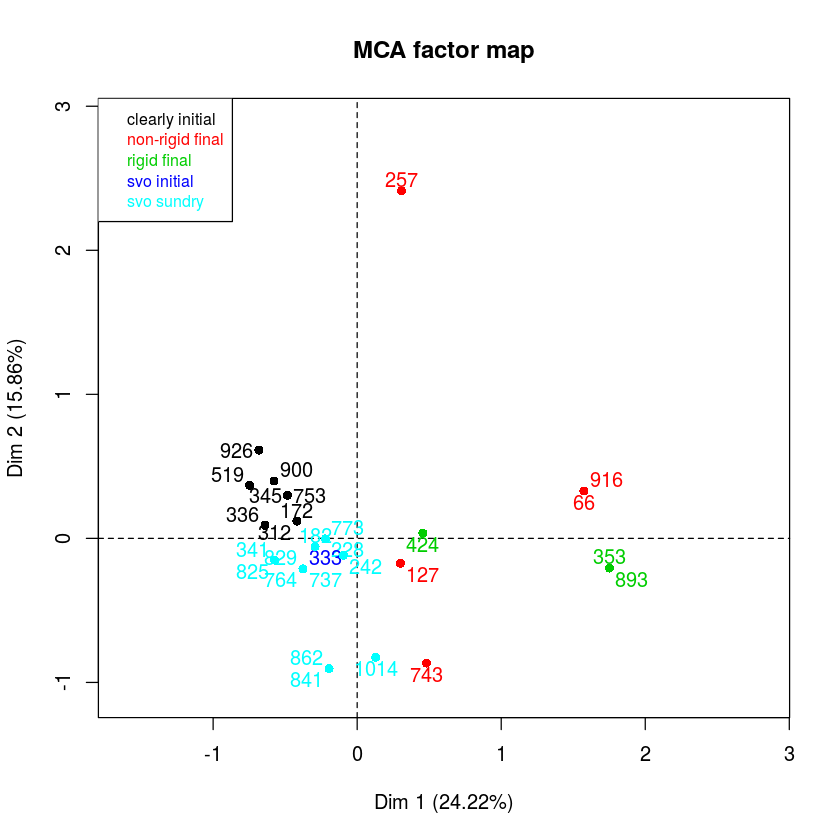

In [158]:
ofdata$headclass <- as.factor(x)
ofdata$origindex <-NULL
mca <- MCA(ofdata[langids,],quali.sup=9:13,graph=FALSE)
plot(mca,choix="ind",habillage="headclass",invisible=c("var","quali.sup"))

This seems reasonable.

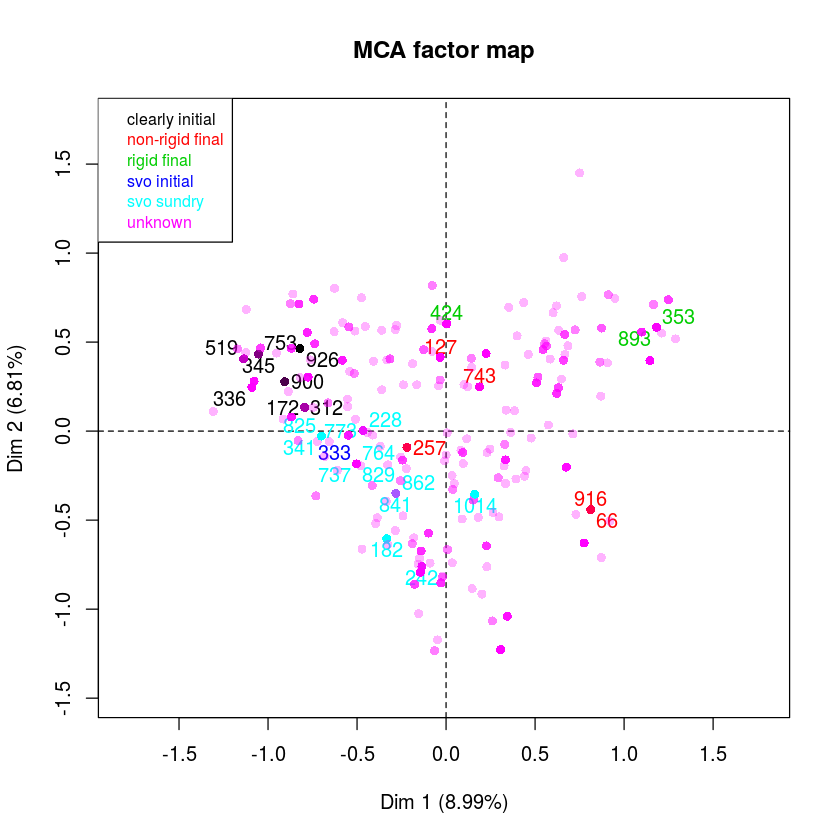

In [160]:
mca <- MCA(ofdata,quali.sup=9:13,graph=FALSE)
plot(mca,choix="ind",select=langids,habillage="headclass",invisible=c("var","quali.sup"))